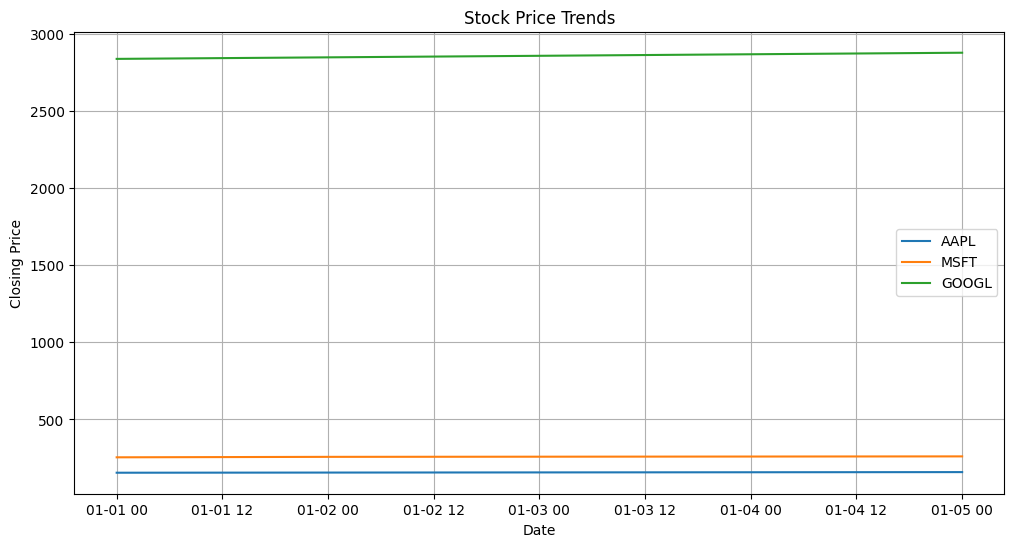

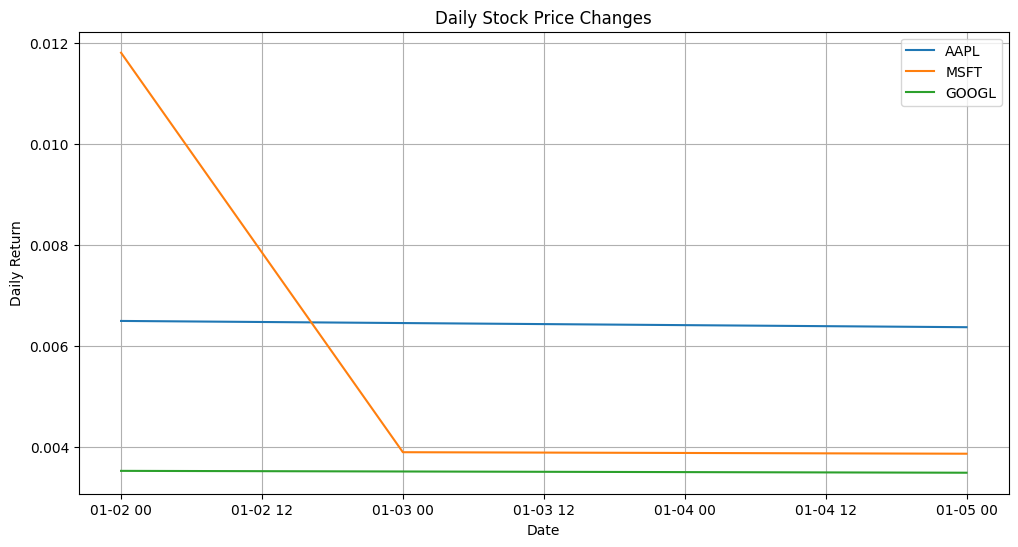

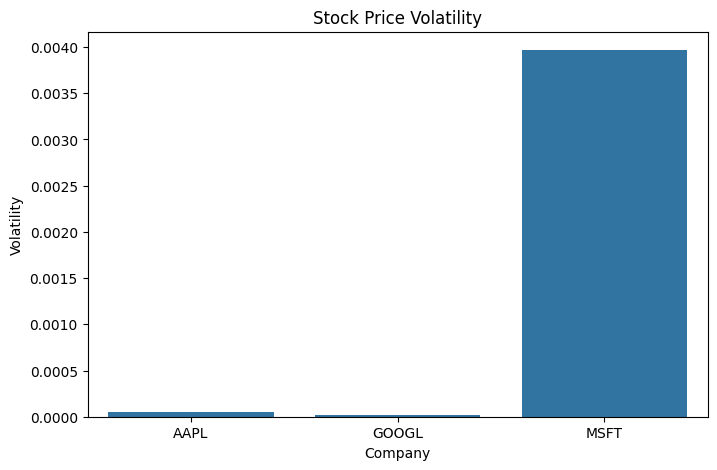

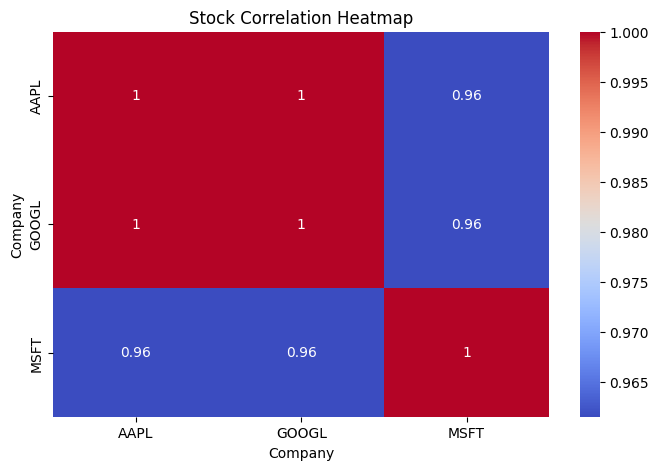

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("stock.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Plot 1: Stock Price Trends
plt.figure(figsize=(12,6))
for company in df["Company"].unique():
    subset = df[df["Company"] == company]
    plt.plot(subset["Date"], subset["Close"], label=company)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends")
plt.legend()
plt.grid(True)
plt.savefig("static/stock_price_trends.png")  # Save image
plt.show()

# Plot 2: Daily Returns
df["Daily Return"] = df.groupby("Company")["Close"].pct_change()
plt.figure(figsize=(12,6))
for company in df["Company"].unique():
    subset = df[df["Company"] == company]
    plt.plot(subset["Date"], subset["Daily Return"], label=company)
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Stock Price Changes")
plt.legend()
plt.grid(True)
plt.savefig("static/daily_returns.png")
plt.show()

# Plot 3: Stock Volatility
volatility = df.groupby("Company")["Daily Return"].std()
plt.figure(figsize=(8,5))
sns.barplot(x=volatility.index, y=volatility.values)
plt.xlabel("Company")
plt.ylabel("Volatility")
plt.title("Stock Price Volatility")
plt.savefig("static/stock_volatility.png")
plt.show()

# Plot 4: Correlation Heatmap
pivot_df = df.pivot(index="Date", columns="Company", values="Close")
plt.figure(figsize=(8,5))
sns.heatmap(pivot_df.corr(), annot=True, cmap="coolwarm")
plt.title("Stock Correlation Heatmap")
plt.savefig("static/stock_correlation.png")
plt.show()

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from flask import Flask, render_template_string
import threading
import os

# Load dataset
df = pd.read_csv("stock.csv")

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# 1️⃣ Stock Price Trends
fig_trends = px.line(df, x="Date", y="Close", color="Company", title="Stock Price Trends")

# 2️⃣ Daily Stock Price Changes
df["Daily Change"] = df.groupby("Company")["Close"].pct_change()
fig_changes = px.line(df, x="Date", y="Daily Change", color="Company", title="Daily Stock Price Changes")

# 3️⃣ Stock Correlation Heatmap
pivot_df = df.pivot(index="Date", columns="Company", values="Close")
fig_corr = px.imshow(pivot_df.corr(), title="Stock Correlation Heatmap")

# Convert Plotly figures to HTML
fig_trends_html = fig_trends.to_html(full_html=False)
fig_changes_html = fig_changes.to_html(full_html=False)
fig_corr_html = fig_corr.to_html(full_html=False)

# Flask App
app = Flask(__name__)  # ✅ fixed __name__ usage

# HTML Template
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Stock Market Dashboard</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>
    <h1>📈 Stock Market Dashboard</h1>
    <div>{{ fig_trends|safe }}</div>
    <div>{{ fig_changes|safe }}</div>
    <div>{{ fig_corr|safe }}</div>
</body>
</html>
"""

# Flask Route
@app.route("/")
def home():
    return render_template_string(
        html_template, 
        fig_trends=fig_trends_html, 
        fig_changes=fig_changes_html, 
        fig_corr=fig_corr_html
    )

# Run Flask in a separate thread
def run_flask():
    app.run(host='0.0.0.0', port=5000, debug=True, use_reloader=False, threaded=True)

# Start Flask App
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.153.217:5000
Press CTRL+C to quit
192.168.153.217 - - [29/Apr/2025 19:52:35] "GET / HTTP/1.1" 200 -
192.168.153.217 - - [29/Apr/2025 19:52:45] "GET /favicon.ico HTTP/1.1" 404 -
